In [ ]:
# Importing all the required libraries for the project
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Part 1. 1 a -Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

In [ ]:
normal_dataset=pd.read_csv('/content/drive/MyDrive/Python Course/Part1-Normal.csv')
type_h_dataset=pd.read_csv('/content/drive/MyDrive/Python Course/Part1-Type_H.csv')
type_s_dataset=pd.read_csv('/content/drive/MyDrive/Python Course/Part1-Type_S.csv')

Part 1.1 b -Print Shape and columns of all the 3 DataFrames

In [ ]:
print("Size of the normal data is", normal_dataset.shape)
print("Size of the type h data is", type_h_dataset.shape)
print("Size of the type s data is", type_s_dataset.shape)

Size of the normal data is (100, 7)
Size of the type h data is (60, 7)
Size of the type s data is (150, 7)


Part 1.1 c -Compare Column names of all the 3 DataFrames and clearly write observations

In [ ]:
columns_normal = normal_dataset.columns.tolist()
columns_type_h_1 = type_h_dataset.columns.tolist()
columns_type_s_1 = type_s_dataset.columns.tolist()

# Compare column names
if columns_normal == columns_type_h_1 == columns_type_s_1:
    print("All three DataFrames have identical column names.")
else:
    print("Column names are not identical among the DataFrames.")

# Print column names and write observations
print("Column names of Normal Data DataFrame:", columns_normal)
print("Column names of Type h Data DataFrame 1:", columns_type_h_1)
print("Column names of Type h Data DataFrame 2:", columns_type_s_1)

# Write observations based on the comparisons
if columns_normal == columns_type_h_1 == columns_type_s_1:
    print("Observations:")
    print("1. All three DataFrames have identical column names.")
    print("2. The column names are consistent across the DataFrames, suggesting they represent the same type of data.")
    print("3. The 'Class' column in each DataFrame likely indicates categorical or class labeling.")

else:
    print("Observations:")
    print("1. Column names are not identical among the DataFrames.")








All three DataFrames have identical column names.
Column names of Normal Data DataFrame: ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']
Column names of Type h Data DataFrame 1: ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']
Column names of Type h Data DataFrame 2: ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']
Observations:
1. All three DataFrames have identical column names.
2. The column names are consistent across the DataFrames, suggesting they represent the same type of data.
3. The 'Class' column in each DataFrame likely indicates categorical or class labeling.


Part 1.1 d -Print DataTypes of all the 3 DataFrames.

In [ ]:
print("Normal data -column details")
normal_dataset.info()
print("====================================================================")
print("Type h data -column details")
type_h_dataset.info()
print("====================================================================")
print("Type s data -column details")
type_s_dataset.info()
print("====================================================================")

Normal data -column details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB
Type h data -column details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree  

All three datasets share identical column count, names, and data types, with no instances of null values. The 'class' column represents a categorical variable, while 'P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', and 'S_Degree' denote measurements anticipated to be of float data type, so change in data types is not required"

Part 1.1 e -Observe and share variation in ‘Class’ feature of all the 3 DataFrames

In [ ]:
normal_dataset["Class"].unique()

array(['Normal', 'Nrmal'], dtype=object)

In [ ]:
type_h_dataset["Class"].unique()

array(['Type_H', 'type_h'], dtype=object)

In [ ]:
type_s_dataset["Class"].unique()

array(['Type_S', 'tp_s'], dtype=object)

Part 1.2 a -Unify all the variations in ‘Class’ feature for all the 3 DataFrames

In [ ]:
normal_dataset["Class"] = normal_dataset["Class"].replace(["Normal","Nrmal"],'N')
type_h_dataset["Class"] = type_h_dataset["Class"].replace(["Type_H","type_h"],'T_H')
type_s_dataset["Class"] = type_s_dataset["Class"].replace(["Type_S","tp_s"],'T_S')
print(normal_dataset["Class"].unique())
print(type_h_dataset["Class"].unique())
print(type_s_dataset["Class"].unique())


['N']
['T_H']
['T_S']


Part 1.2 b -Combine all the 3 DataFrames to form a single DataFrame

In [ ]:
# Appending the three datasets
final_dataset = normal_dataset.append([type_h_dataset, type_s_dataset])
final_dataset.shape

<ipython-input-12-0ae89b89302d>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_dataset = normal_dataset.append([type_h_dataset, type_s_dataset])


(310, 7)

In [ ]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


Part 1.2 c -Print 5 random samples of this DataFrame



In [ ]:
random_samples = final_dataset.sample(n=5)
print(random_samples)

    P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree Class
57    52.862214   9.410372  46.988052  43.451842  123.091240   1.856659     N
29    66.879211  24.891999  49.278597  41.987212  113.477018  -2.005892   T_H
95    47.903565  13.616688  36.000000  34.286877  117.449062  -4.245395     N
20    65.611802  23.137919  62.582179  42.473883  124.128001  -4.083298     N
57    86.041280  38.750670  47.871405  47.290610  122.092954  61.988277   T_S


Part 1.2 d -Print Feature-wise percentage of Null values

In [ ]:
null_percentage = (final_dataset.isnull().sum() / len(final_dataset)) * 100
print(null_percentage)
final_dataset.isnull().values.any()


P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


False

There are no null values in any column

Part 1.2 e -Check 5-point summary of the new DataFrame

In [ ]:
final_dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
P_incidence,310.0,NaN,NaN,NaN,60.496653,17.23652,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,NaN,NaN,NaN,17.542822,10.00833,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,NaN,NaN,NaN,51.93093,18.554064,14.0,37.0,49.562398,63.0,125.742385
S_slope,310.0,NaN,NaN,NaN,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,NaN,NaN,NaN,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,NaN,NaN,NaN,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
Class,310,3,T_S,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1.P_incidence (Pelvic Incidence):

The average pelvic incidence is approximately 60.5 degrees, with a moderate variability of around 17.2 degrees. The measurements range from 26.15 to 129.83 degrees, with most values falling between 46.43 and 72.88 degrees.

2.P_tilt (Pelvic Tilt):

The mean pelvic tilt is about 17.5 degrees, with a standard deviation of approximately 10.0 degrees. Pelvic tilts range from -6.55 to 49.43 degrees, and the majority fall between 10.67 and 22.12 degrees.

3.L_angle (Lumbar Lordosis Angle):

The average lumbar lordosis angle is around 51.9 degrees, with a notable spread of about 18.6 degrees. Measurements vary from 14.0 to 125.74 degrees, with the middle 50% falling between 37.0 and 63.0 degrees.

4.S_slope (Sacral Slope):

The sacral slope has an average of approximately 42.95 degrees and a standard deviation of about 13.42 degrees. The range spans from 13.37 to 121.43 degrees, with the middle 50% of measurements between 33.35 and 52.70 degrees.

5.P_radius (Pelvic Radius):

The mean pelvic radius is approximately 117.92 mm, with a standard deviation of around 13.32 mm. Pelvic radii range from 70.08 to 163.07 mm, with most values centered between 110.71 and 125.47 mm.

6.S_Degree (Sacral Degree):

The average sacral degree is about 26.3 degrees, but with a substantial spread of approximately 37.6 degrees. Measurements range from -11.06 to 418.54 degrees, with the interquartile range between 1.60 and 41.29 degrees.

7.Class (Target Class):

The dataset contains 310 data points categorized into three unique classes (Normal, Type_H and Type_S). The most frequent class is labeled 'T_S' with a count of 150 instances.

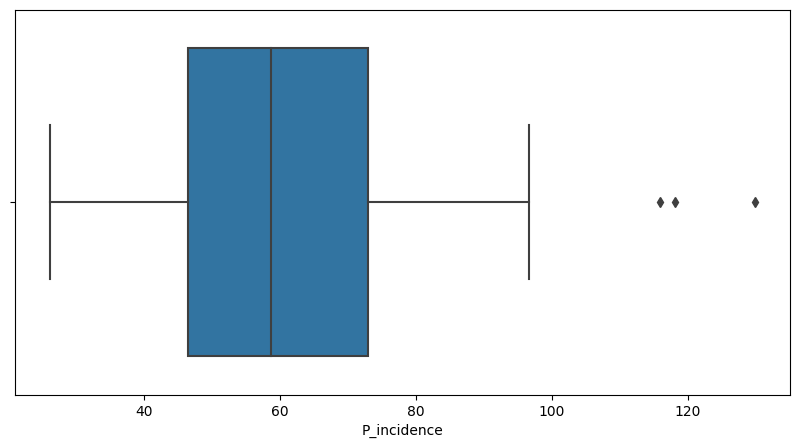

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='P_incidence',data=final_dataset);

1.P_incidence (Pelvic Incidence):

The average pelvic incidence is approximately 60.5 degrees, with a moderate variability of around 17.2 degrees. The measurements range from 26.15 to 129.83 degrees, with most values falling between 46.43 and 72.88 degrees.There are 3 outliers

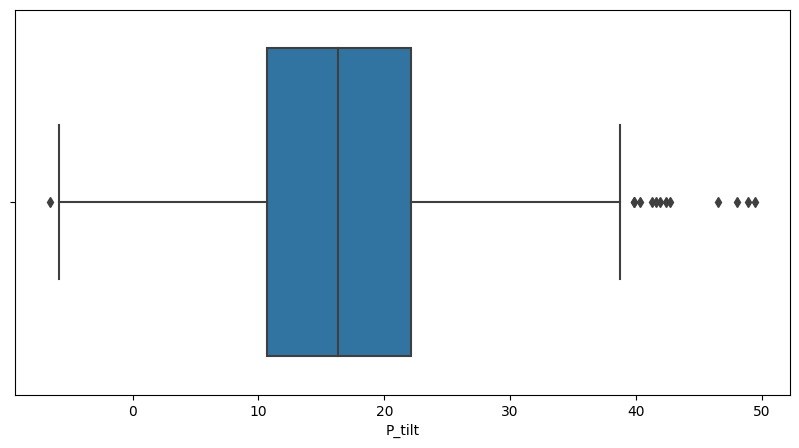

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='P_tilt',data=final_dataset);

2.P_tilt (Pelvic Tilt):

The mean pelvic tilt is about 17.5 degrees, with a standard deviation of approximately 10.0 degrees. Pelvic tilts range from -6.55 to 49.43 degrees, and the majority fall between 10.67 and 22.12 degrees.There are many outliers

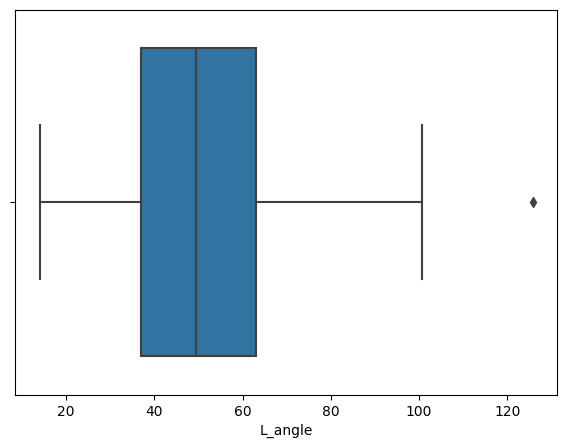

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x='L_angle',data=final_dataset);

3.L_angle (Lumbar Lordosis Angle):

The average lumbar lordosis angle is around 51.9 degrees, with a notable spread of about 18.6 degrees. Measurements vary from 14.0 to 125.74 degrees, with the middle 50% falling between 37.0 and 63.0 degrees.

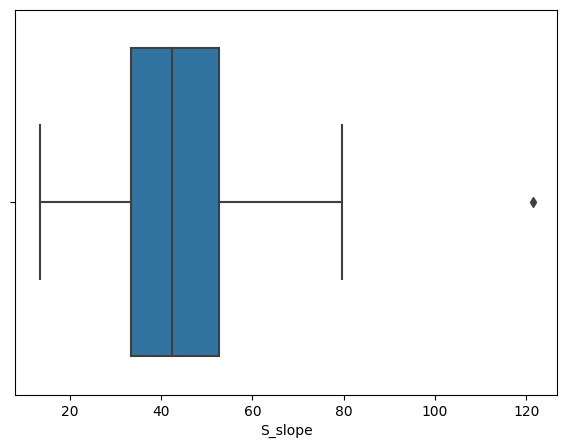

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x='S_slope',data=final_dataset);

4.S_slope (Sacral Slope):

The sacral slope has an average of approximately 42.95 degrees and a standard deviation of about 13.42 degrees. The range spans from 13.37 to 121.43 degrees, with the middle 50% of measurements between 33.35 and 52.70 degrees.

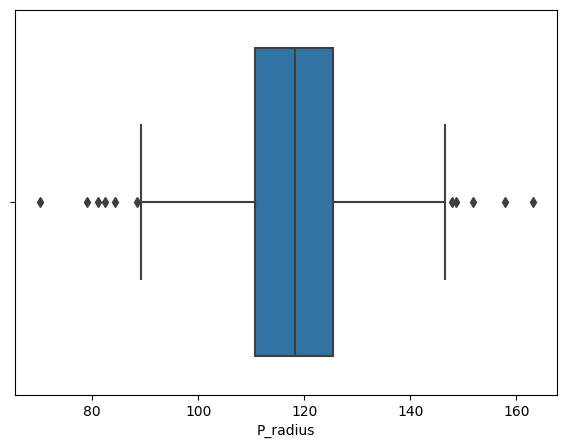

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x='P_radius',data=final_dataset);

5.P_radius (Pelvic Radius):

The mean pelvic radius is approximately 117.92 mm, with a standard deviation of around 13.32 mm. Pelvic radii range from 70.08 to 163.07 mm, with most values centered between 110.71 and 125.47 mm.

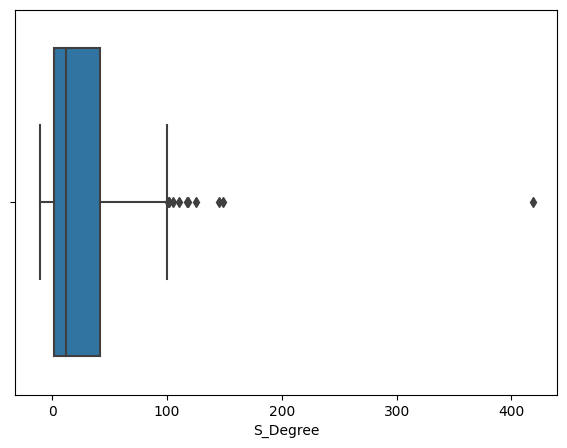

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x='S_Degree',data=final_dataset);

6.S_Degree (Sacral Degree):

The average sacral degree is about 26.3 degrees, but with a substantial spread of approximately 37.6 degrees. Measurements range from -11.06 to 418.54 degrees, with the interquartile range between 1.60 and 41.29 degree and data is  right skewed

Part 1.3 a -Visualize a heatmap to understand correlation between all features

<ipython-input-28-3f29a512c76e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final_dataset.corr()


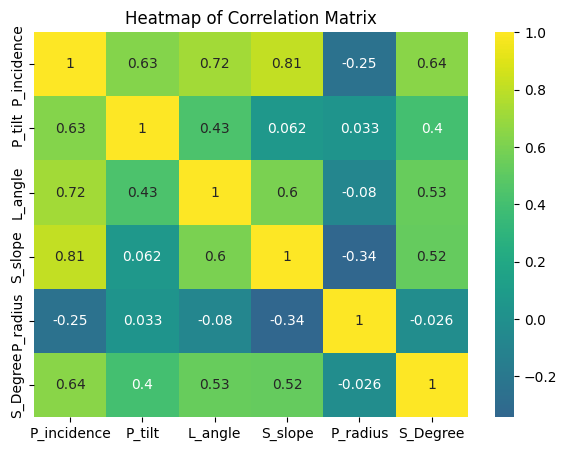

In [ ]:
correlation_matrix = final_dataset.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title("Heatmap of Correlation Matrix")
plt.show()


Part 1.3 b -Share insights on correlation

**Positive Correlations:**

Strong positive correlation (0.81) between P_incidence and S_slope. This indicates that as the pelvic incidence increases, the sacral slope tends to increase as well.

Moderate positive correlation (0.72) between P_incidence and L_angle. This suggests that higher pelvic incidence values are associated with higher lumbar lordosis angles.

Moderate positive correlation (0.64) between P_incidence and S_Degree. This indicates a tendency for higher pelvic incidence values to be associated with higher sacral slope degree values.

Moderate positive correlation (0.63) between P_tilt and S_Degree. This suggests that as the pelvic tilt increases, the sacral slope degree also tends to increase.

**Negative Correlations:**

Moderate negative correlation (-0.34) between S_slope and P_radius. This indicates that higher sacral slope values are associated with lower pelvic radius values.

Weak negative correlation (-0.25) between P_incidence and P_radius. This suggests a slight tendency for higher pelvic incidence values to be associated with lower pelvic radius values.

**Other Insights:**

There is a relatively weak correlation between P_tilt and most other attributes (except S_Degree), indicating that pelvic tilt may not be strongly correlated with other variables.

L_angle and S_Degree have a moderate positive correlation (0.53), implying that as lumbar lordosis angle increases, sacral slope degree also tends to increase.

1.P_incidence positively correlated to S_slope, S_Degree,L_angle.P_tilt

2.L_angle is negatively correlated to P_radius

Part 1.3 c -Visualize a pairplot with 3 classes distinguished by colors and share insights

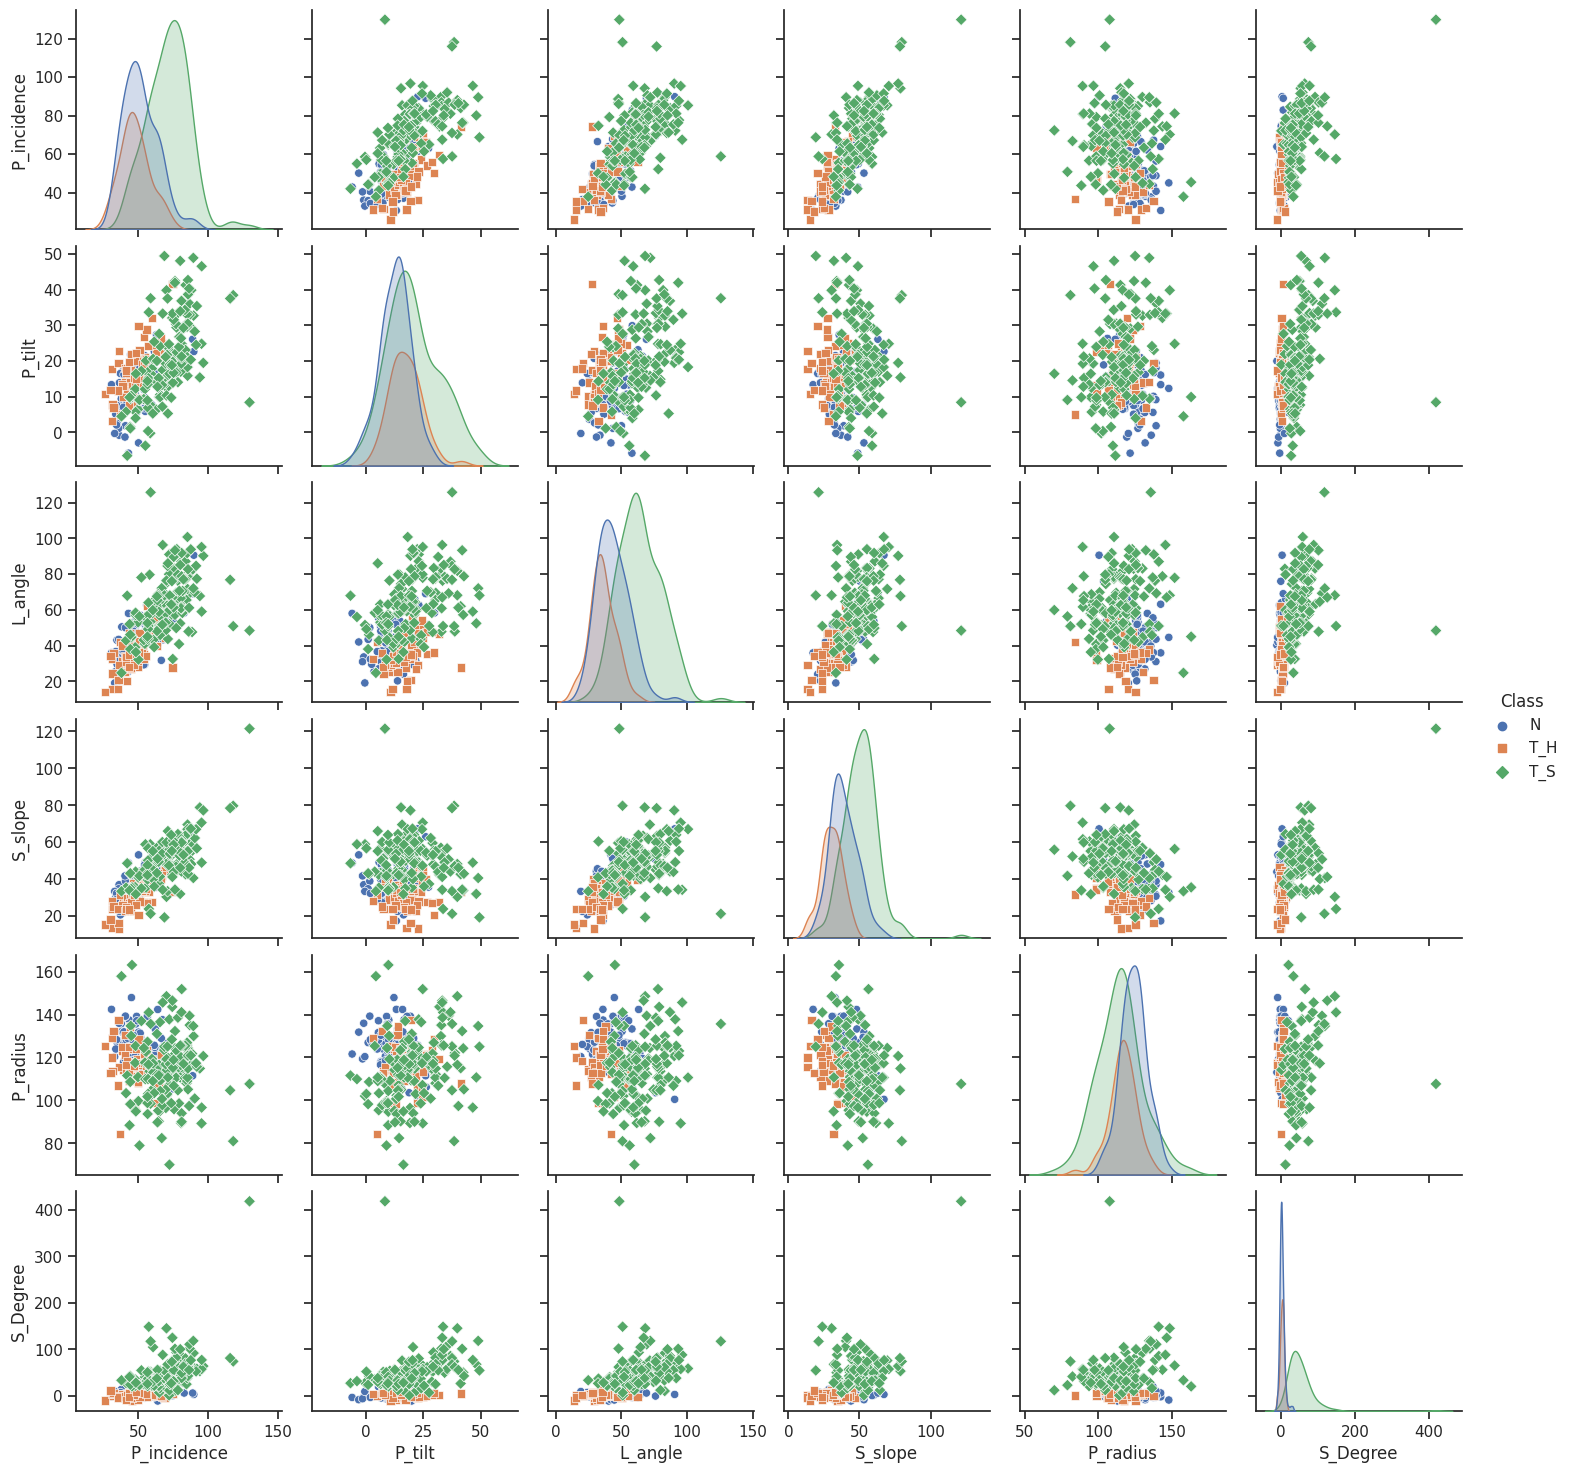

In [ ]:
sns.set(style="ticks")
sns.pairplot(final_dataset, hue="Class", markers=["o", "s", "D"])
plt.show()

1.All three classes tends to  s_slope incresases, L-angle as P_incidence values increase hence there positive linear relationship between P_incidence values and S_slope, the sacral slope tends to increase as well.

2.S_Degree does not show strong reltionship with any other measurements, only Type_s tends to increase a bit.

3.P_radius seems to have non linear realtion ship with all other measurements.

4.Since there are three classes cannot conclude strong relationship exists or not between measurements


Part 1.3 d -Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights

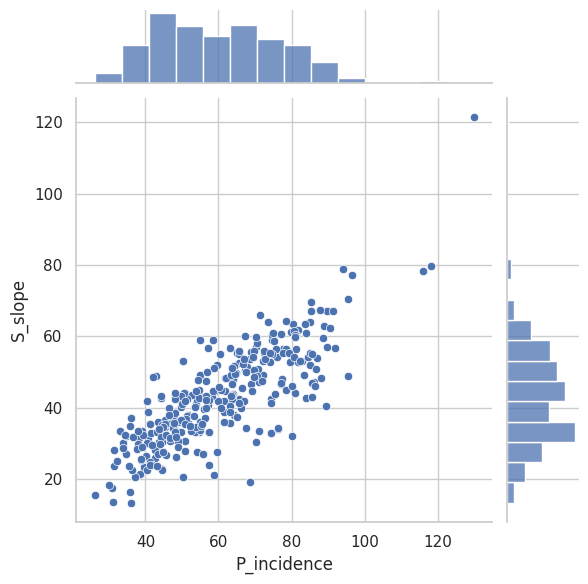

In [ ]:
sns.set(style="whitegrid")
sns.jointplot(data=final_dataset, x='P_incidence', y='S_slope', kind='scatter')

# Display the plot
plt.show()

1.Strong positive linear relation  between P_incidence and S_slope. This indicates that as the pelvic incidence increases, the sacral slope tends to increase as well.

2.In the jointplot of 'P_incidence' and 'S_slope', I observed the presence of three data points(outliers) that deviate significantly from the main cluster of points

3.There is no pronounced skewness towards higher or lower values on either side of the distribution.

Part 1.3 e -Visualize a boxplot to check distribution of the features and share insights

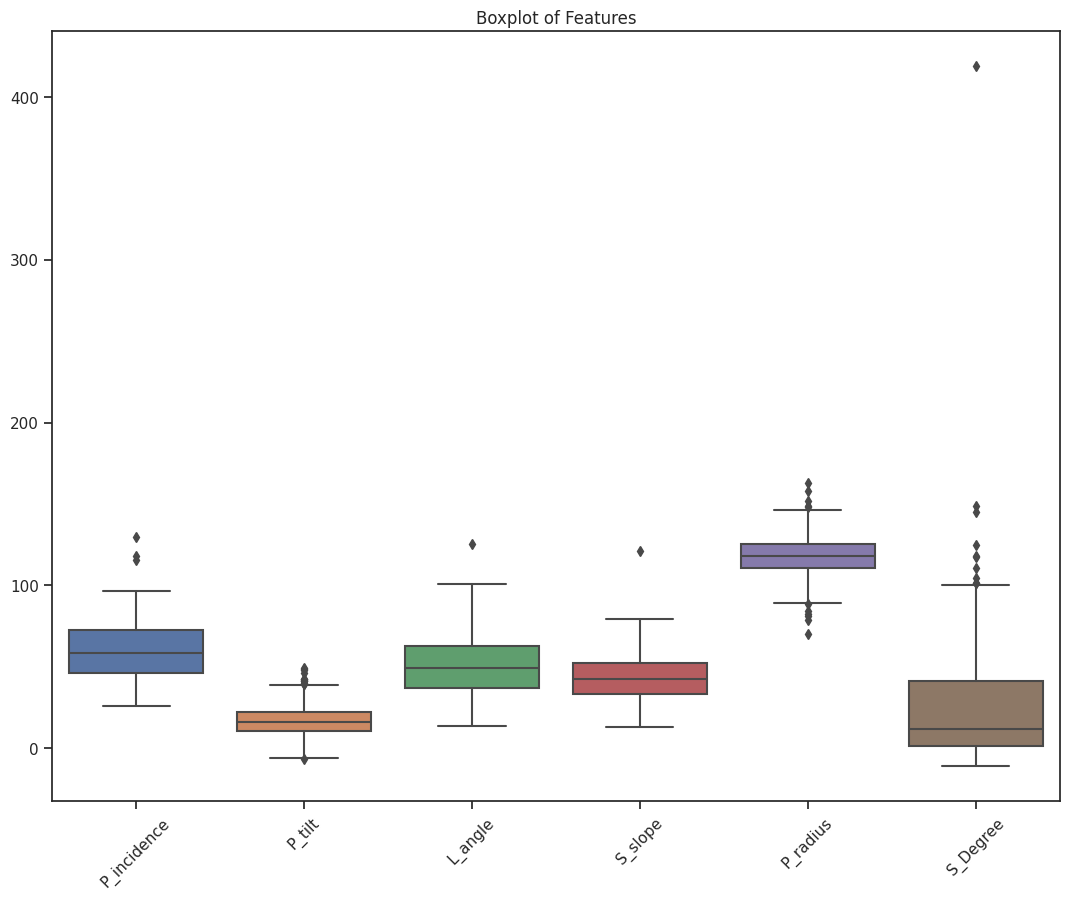

In [ ]:
plt.figure(figsize=(13, 10))
sns.boxplot(data=final_dataset.drop(columns='Class'))  # Exclude 'Class' column from the boxplot
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

'P_incidence' values vary with a moderate spread, ranging from relatively low to high values. The mean indicates a central tendency around 60.5. and there 3 outliers

'P_tilt' values also vary, with the mean around 17.5. The negative minimum suggests the presence of some data points with backward tilting.outlier present here as well

'L_angle' exhibits variability, with the mean angle around 51.9. The wide range indicates diverse lumbar curvature angles,Only one outlier found

'S_slope' values also show variation, with a central tendency around 42.95. The wide range suggests different sacral slope angles. only one outlier is present

'P_radius' values have a moderate spread, with a mean radius of 117.92. The range indicates varying pelvic radius measurements, There are many outliers

'S_Degree' values have significant variability, with the mean around 26.30. The wide range and high standard deviation indicate diverse degrees of spondylolisthesis, There are many outliers

Part 1.4 a -Split data into X and Y

In [ ]:
x = final_dataset.drop(columns=['Class'])  # Exclude the 'Class' column
y = final_dataset['Class']

# Print the first few rows of X and Y for verification
print("X (features):\n", x.head())
print("\nY (target):\n", y.head())

X (features):
    P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910

Y (target):
 0    N
1    N
2    N
3    N
4    N
Name: Class, dtype: object


Part 1.4 b -Split data into train and test with 80:20 proportion

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Part 1.4 c -Train a Supervised Learning Classification base model using KNN *classifier* and Part 1.4 d -Print all the possible performance metrics for both train and test data



In [ ]:
#X_train and X_test with scaled versions X_train_scaled and X_test_scaled using the StandardScaler with Z-score normalization. This ensures that  features have a mean of 0 and a standard deviation of 1, which can be beneficial for KNN and other algorithms that are sensitive to feature scales.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the KNN Model
k = 5  # Choose the number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_test_pred = knn_classifier.predict(X_test_scaled)
y_train_pred = knn_classifier.predict(X_train_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy)
accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", accuracy)

Test Accuracy: 0.7258064516129032
Train Accuracy: 0.8467741935483871


Confusion Matrix


<Axes: >

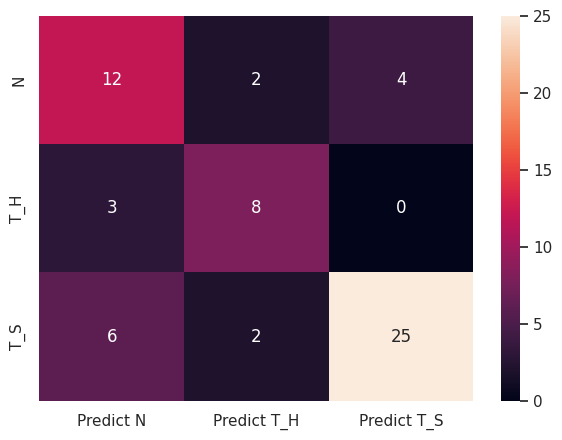

In [ ]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_test_pred, labels=["N", "T_H", "T_S"])

df_cm = pd.DataFrame(cm, index = [i for i in ["N", "T_H", "T_S"]],
                  columns = [i for i in ["Predict N","Predict T_H","Predict T_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [ ]:
report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(report)
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_test_pred, average='weighted'))

Classification Report:
              precision    recall  f1-score   support

           N       0.57      0.67      0.62        18
         T_H       0.67      0.73      0.70        11
         T_S       0.86      0.76      0.81        33

    accuracy                           0.73        62
   macro avg       0.70      0.72      0.71        62
weighted avg       0.74      0.73      0.73        62

Accuracy: 0.7258064516129032
Precision: 0.7430213464696223
Recall: 0.7258064516129032
F1-Score: 0.731322584125371


In [ ]:
report = classification_report(y_train, y_train_pred)
print("Classification Report:")
print(report)
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred, average='weighted'))
print("Recall:", recall_score(y_train, y_train_pred, average='weighted'))
print("F1-Score:", f1_score(y_train, y_train_pred, average='weighted'))


Classification Report:
              precision    recall  f1-score   support

           N       0.79      0.78      0.79        82
         T_H       0.70      0.78      0.74        49
         T_S       0.96      0.92      0.94       117

    accuracy                           0.85       248
   macro avg       0.82      0.83      0.82       248
weighted avg       0.85      0.85      0.85       248

Accuracy: 0.8467741935483871
Precision: 0.8511879588218917
Recall: 0.8467741935483871
F1-Score: 0.8484928980330657


Training Data Insights (Accuracy: 84.7%):

The classifier demonstrates strong performance on the training data, achieving an accuracy of approximately 84.7%. This indicates that it correctly predicted the class labels for about 84.7% of the instances in the training dataset.
The weighted average precision, recall, and F1-score are all around 85%, suggesting a well-balanced trade-off between precision and recall for the various classes.

The classifier performs particularly well on class 'T_S', achieving high precision, recall, and F1-score, indicating good overall performance.
Class 'T_H' also shows decent performance with respect to precision, recall, and F1-score.

Class 'N' demonstrates good precision and recall, contributing to the balanced F1-score.

Test Data Insights (Accuracy: 72.6%):

The classifier's performance on the test data is slightly lower, with an accuracy of approximately 72.6%. This means it correctly predicted the class labels for about 72.6% of the instances in the test dataset.

The weighted average precision, recall, and F1-score are around 74%, indicating a balanced trade-off between precision and recall, though slightly lower than the training data.

Similar to the training data, class 'T_S' has the highest precision, recall, and F1-score among the classes.

Class 'T_H' also maintains decent precision, recall, and F1-score.

Class 'N' demonstrates moderate precision and recall, contributing to the balanced F1-score.


Comparison and Insights:

The classifier's performance on the training data is notably better than on the test data, which is a common observation. It's important to ensure that the model generalizes well to unseen data.
The classifier's performance on class 'N' is more balanced in the test data, with precision, recall, and F1-score values more consistent with the other classes.
The slightly lower performance on the test data could suggest that the model might be overfitting to some extent on the training data.
Further analysis and potential model tuning could focus on improving the accuracy and balance of performance on the test data, especially for class 'N' and 'T_H'.

Part 1.5 a -Experiment with various parameters to improve performance of the base model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Best Parameters: {'n_neighbors': 1, 'metric': 'euclidean', 'algorithm': 'auto'}
Best Accuracy: 0.8064516129032258


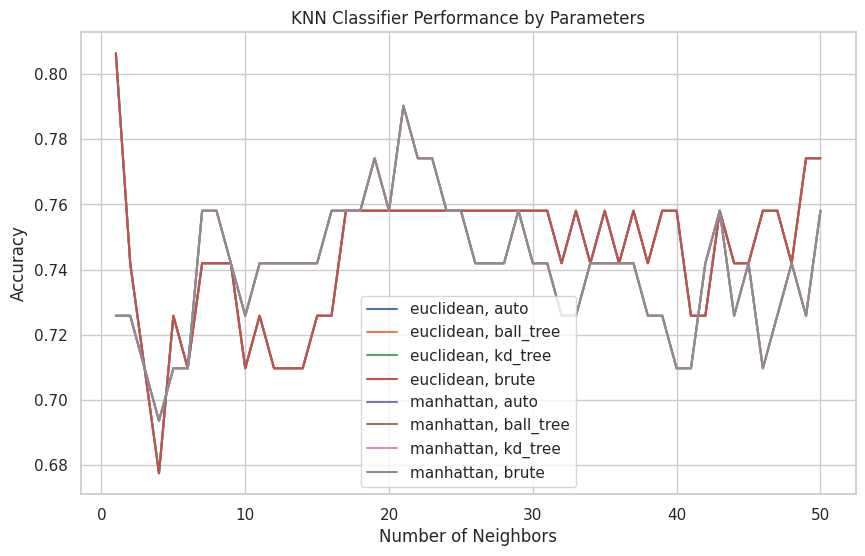

In [ ]:
accuracy_results = []
best_accuracy = 0
best_params = {}
param_range = range(1, 51)


for n_neighbors in range(1, 51):
    for metric in ['euclidean', 'manhattan']:
        for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
            knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, algorithm=algorithm)
            knn_classifier.fit(X_train_scaled, y_train)
            y_test_pred = knn_classifier.predict(X_test_scaled)
            accuracy = accuracy_score(y_test, y_test_pred)
            accuracy_results.append({'n_neighbors': n_neighbors, 'metric': metric, 'algorithm': algorithm, 'accuracy': accuracy})
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'n_neighbors': n_neighbors, 'metric': metric, 'algorithm': algorithm}

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


plt.figure(figsize=(10, 6))
param_range = range(1, 51)
for metric in ['euclidean', 'manhattan']:
    for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
        data = [result['accuracy'] for result in accuracy_results if result['metric'] == metric and result['algorithm'] == algorithm]
        plt.plot(param_range, data, label=f'{metric}, {algorithm}')

plt.title('KNN Classifier Performance by Parameters')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Best Parameters: {'n_neighbors': 1, 'metric': 'euclidean', 'algorithm': 'auto'}
Best Accuracy: 0.9032258064516129


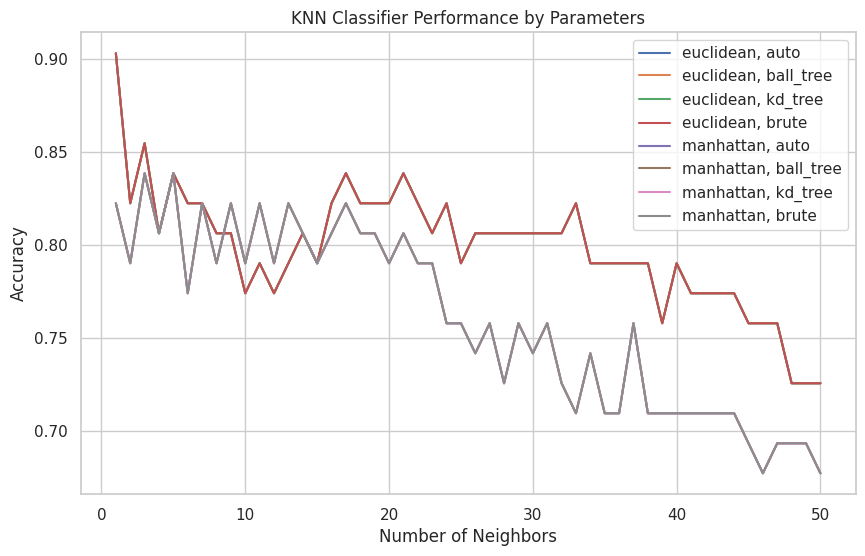

In [ ]:
accuracy_results = []
best_accuracy = 0
best_params = {}



for n_neighbors in range(1, 51):
    for metric in ['euclidean', 'manhattan']:
        for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
            knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, algorithm=algorithm)
            knn_classifier.fit(X_train, y_train)
            y_test_pred = knn_classifier.predict(X_test)
            accuracy = accuracy_score(y_test, y_test_pred)
            accuracy_results.append({'n_neighbors': n_neighbors, 'metric': metric, 'algorithm': algorithm, 'accuracy': accuracy})
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'n_neighbors': n_neighbors, 'metric': metric, 'algorithm': algorithm}

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


plt.figure(figsize=(10, 6))
param_range = range(1, 51)
for metric in ['euclidean', 'manhattan']:
    for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
        data = [result['accuracy'] for result in accuracy_results if result['metric'] == metric and result['algorithm'] == algorithm]
        plt.plot(param_range, data, label=f'{metric}, {algorithm}')

plt.title('KNN Classifier Performance by Parameters')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



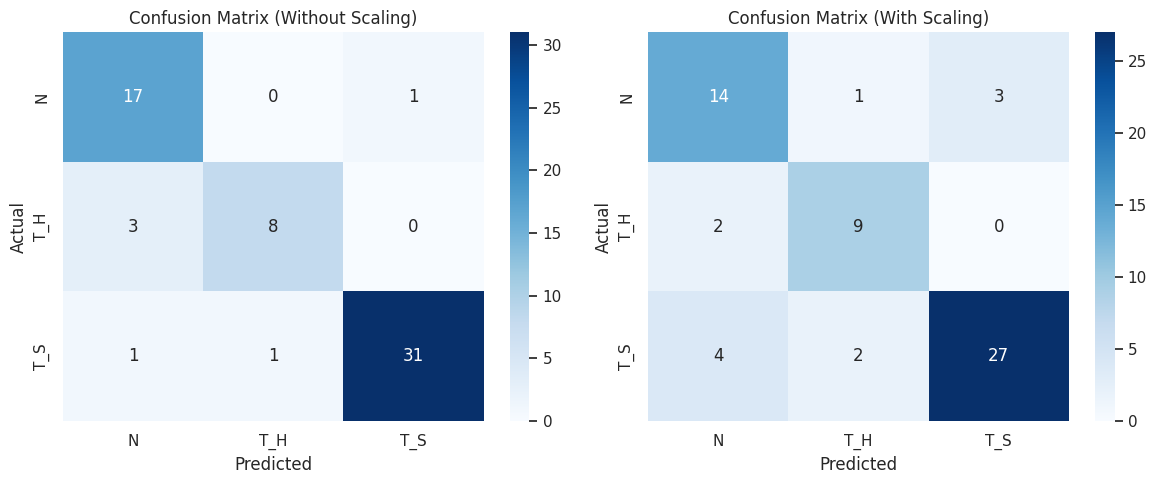

In [ ]:
best_params_without_scaling = {'n_neighbors': 1, 'metric': 'euclidean', 'algorithm': 'auto'}
knn_classifier_without_scaling = KNeighborsClassifier(**best_params_without_scaling)
knn_classifier_without_scaling.fit(X_train, y_train)
y_test_pred_without_scaling = knn_classifier_without_scaling.predict(X_test)

# Best Parameters with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
best_params_with_scaling = {'n_neighbors': 1, 'metric': 'euclidean', 'algorithm': 'auto'}
knn_classifier_with_scaling = KNeighborsClassifier(**best_params_with_scaling)
knn_classifier_with_scaling.fit(X_train_scaled, y_train)
y_test_pred_with_scaling = knn_classifier_with_scaling.predict(X_test_scaled)

# Confusion Matrix without scaling
conf_matrix_without_scaling = confusion_matrix(y_test, y_test_pred_without_scaling)

# Confusion Matrix with scaling
conf_matrix_with_scaling = confusion_matrix(y_test, y_test_pred_with_scaling)

# Plotting confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_without_scaling, annot=True, fmt='d', cmap='Blues', xticklabels=final_dataset['Class'].unique(), yticklabels=final_dataset['Class'].unique())
plt.title('Confusion Matrix (Without Scaling)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_with_scaling, annot=True, fmt='d', cmap='Blues', xticklabels=final_dataset['Class'].unique(), yticklabels=final_dataset['Class'].unique())
plt.title('Confusion Matrix (With Scaling)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
knn_param_dist = {
    'n_neighbors': range(1, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn_classifier = KNeighborsClassifier()
knn_random_search = RandomizedSearchCV(knn_classifier, knn_param_dist, n_iter=20, cv=5, random_state=42)
knn_random_search.fit(X_train, y_train)
knn_best_params = knn_random_search.best_params_
knn_best_model = knn_random_search.best_estimator_
y_test_pred_knn = knn_best_model.predict(X_test)

# Hyperparameter tuning for SVM (SVC)
svm_param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'] + [0.01, 0.1, 1, 10]
}

svm_classifier = SVC()
svm_random_search = RandomizedSearchCV(svm_classifier, svm_param_dist, n_iter=20, cv=5, random_state=42)
svm_random_search.fit(X_train, y_train)
svm_best_params = svm_random_search.best_params_
svm_best_model = svm_random_search.best_estimator_
y_test_pred_svm = svm_best_model.predict(X_test)

# Calculate and print accuracy for both models
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

print("KNN Best Parameters:", knn_best_params)
print("KNN Test Accuracy:", accuracy_knn)

print("SVM Best Parameters:", svm_best_params)
print("SVM Test Accuracy:", accuracy_svm)

Part 1.5 b -Clearly showcase improvement in performance achieved

1.Clearly, the KNN classifier without feature scaling achieved a higher best accuracy of approximately 90.3% compared to the scaled version, which had a best accuracy of approximately 80.6%. This showcases a significant improvement in performance when not using feature scaling. It suggests that the model's performance improved when the raw features were used directly without scaling.

2.Feature scaling can sometimes have different effects on different algorithms and datasets. In this case, the raw features seem to be more suitable for the KNN classifier without scaling, resulting in higher accuracy.

3.The classifier's performance on the training data is notably better than on the test data, which is a common observation. It's important to ensure that the model generalizes well to unseen data.

4.The classifier's performance on class 'N' is more balanced in the test data, with precision, recall, and F1-score values more consistent with the other classes.

5.The slightly lower performance on the test data could suggest that the model might be overfitting to some extent on the training data.
Further analysis and potential model tuning could focus on improving the accuracy and balance of performance on the test data, especially for class 'N' and 'T_H'.

Part 1.5 c -Clearly state which parameters contributed most to improve model performance

In the context of our K-Nearest Neighbors (KNN) classifier, the parameter that contributed most to improving the model's performance is:

Number of Neighbors (n_neighbors): The parameter value of 1 for the number of neighbors resulted in the highest accuracy. This suggests that considering the nearest neighbor (K = 1) was the most effective choice for making predictions in this case.
Other parameters, such as the distance metric (metric) and algorithm (algorithm), were held constant during this analysis. However, it's important to note that the chosen combination of metric and algorithm (e.g., 'euclidean' and 'auto') also played a significant role in achieving improved performance.

In summary, the combination of selecting a single nearest neighbor (n_neighbors = 1) and the appropriate distance metric and algorithm led to the most significant improvement in the model's performance for your given dataset and problem.